<div align="right">
    <img src="descarga.png" style="width: 300px;">
</div>
<div align="center">
    <h1>Problem Set 3</h1>
    <p><strong>Integrantes:</strong> Kilian Ehrenreich, Luis Montero, Cristopher Urbina</p>
    <p><strong>Asignatura:</strong> IN5244-1 Ciencia de los datos</p>
    <p><strong>Profesor:</strong> Richard Weber</p>
</div>

---

## Definición del Problema

La base de datos contempla una muestra de estudiantes que se desvincularon de su escuela en algún momento entre abril y julio del año 2022, definido por la variable `DropoutDate`. Estar desvinculado de la escuela implica estar fuera del sistema escolar, es decir, fuera de la nómina de cualquier escuela pública del país. Algunos estudiantes logran revincularse a una escuela (sea la misma u otra), mientras que otros no.

El 28 de junio de 2022, el MINEDUC envió a cada escuela un reporte sobre la situación de los estudiantes desvinculados de esa escuela que, al 30 de mayo de 2022, no habían logrado revincularse a ninguna escuela (sea la misma u otra). La variable `ListedInDropoutReport` toma el valor 1 si el estudiante está listado en el reporte, y 0 si no. El objetivo del reporte es que las escuelas activen sus redes locales para lograr la revinculación de los estudiantes listados en el reporte, sea en la misma escuela que abandonaron u otra.

Al 31 de agosto de 2022, algunos estudiantes habían logrado revincularse al sistema educacional, es decir, reingresaron a una escuela (sea la misma u otra), lo cual puede medirse por la variable `EnrolledByAug312022`. Algunos no solo lograron revincularse, sino que además se graduaron a fin de año, medido por la variable `GraduatedIn2022`.

## Objetivos

El objetivo principal de este trabajo es fortalecer la capacidad de formular problemas de investigación, con un enfoque en el entendimiento del problema de la organización, y resolverlo aplicando técnicas de ciencia de datos. En particular, el objetivo es predecir el re-enrolamiento en las escuelas, basándose en los datos disponibles de los estudiantes. Para ello, se generarán modelos de clasificación binaria que, con el mejor desempeño alcanzable, puedan realizar la predicción solicitada.

**Objetivo General:**
- Predecir el re-enrolamiento de estudiantes en las escuelas utilizando modelos de clasificación binaria, basados en los datos disponibles sobre su desvinculación y posibles reingresos.

**Objetivos Específicos:**
- Identificar las variables que influyen en la probabilidad de re-enrolamiento de los estudiantes.
- Desarrollar y evaluar modelos de clasificación para predecir el re-enrolamiento al 31 de agosto de 2022.
- Proporcionar recomendaciones basadas en los resultados del modelo para mejorar las estrategias de revinculación en las escuelas.

## Metodología

La metodología para este trabajo se estructurará en varias etapas clave que guiarán el proceso de análisis de datos y desarrollo de modelos de clasificación binaria. A continuación, se detallan los pasos:

1. **Comprensión del Problema y Análisis Exploratorio de Datos (EDA):**
   - Revisión de la base de datos para entender las características de los datos y las variables involucradas (`DropoutDate`, `ListedInDropoutReport`, `EnrolledByAug312022`, `GraduatedIn2022`).
   - Análisis exploratorio de datos para identificar patrones, relaciones y distribuciones de las variables. Esto incluirá visualizaciones, estadísticas descriptivas y análisis de correlación.
   - Detección y tratamiento de valores atípicos y datos faltantes para asegurar la calidad del dataset.

2. **Preparación de los Datos:**
   - Transformación de las variables categóricas y numéricas para que sean adecuadas para el modelado (por ejemplo, codificación de variables categóricas, normalización/estandarización de variables numéricas).
   - División del dataset en conjuntos de entrenamiento y prueba para validar el rendimiento de los modelos.

3. **Selección de Variables y Generación de Características:**
   - Identificación de las variables más relevantes que podrían influir en el re-enrolamiento de los estudiantes.
   - Creación de nuevas características derivadas que podrían mejorar el rendimiento predictivo del modelo (feature engineering).

4. **Desarrollo de Modelos de Clasificación Binaria:**
   - Entrenamiento de diferentes algoritmos de clasificación binaria (por ejemplo, regresión logística, árboles de decisión, random forest, SVM).
   - Ajuste de hiperparámetros para optimizar el rendimiento del modelo.
   - Uso de técnicas de muestreo para manejar el desbalance en las clases (por ejemplo, sobremuestreo de la clase minoritaria, submuestreo de la clase mayoritaria, o técnicas más avanzadas como SMOTE).

5. **Evaluación del Modelo:**
   - Evaluación del rendimiento de los modelos utilizando métricas como precisión, recall, F1-score y área bajo la curva ROC (AUC-ROC).
   - Comparación entre los diferentes modelos para seleccionar el mejor basado en las métricas de rendimiento.

6. **Interpretación y Validación de Resultados:**
   - Análisis de la importancia de las características para entender cuáles son los factores clave que influyen en el re-enrolamiento.
   - Validación del modelo seleccionado en el conjunto de prueba para asegurar que el modelo generaliza bien a nuevos datos.

7. **Recomendaciones:**
   - Implementación del modelo final para realizar predicciones en nuevos datos de estudiantes desvinculados.
   - Elaboración de recomendaciones para las escuelas y el MINEDUC basadas en los resultados del análisis y el rendimiento del modelo para mejorar las estrategias de revinculación.





## Analisis exploratorio de los datos

In [100]:
from sys import displayhook

# Librerias core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')


In [101]:
# Carga de los datos

df = pd.read_stata('../data/casestudy_dropout.dta')
df.head()

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,1.0,0.0,1.0,1.0,0.0,0.0,1.0,20,1.0
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-12,0.0


In [102]:
# Información de los datos
print("Información del dataframe:\n")
display(df.info())
print("Estadisticas basicas del dataframe:\n")
display(df.describe().T)

Información del dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8416 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  Listed

None

Estadisticas basicas del dataframe:



,count,mean,std,min,25%,50%,75%,max
IDstudent,8516.0,4258.500000,2458.501709,1.0,2129.75,4258.5,6387.25,8516.0
IDschool,8516.0,11083.226750,8750.797894,1.0,4450.00,9697.5,14676.00,42061.0
SchoolGrade2022,8516.0,7.397252,3.145355,1.0,5.00,8.0,10.00,12.0
DayOfWeekDroppedOut,8516.0,2.893729,1.407505,1.0,2.00,3.0,4.00,5.0
PrioritaryStudentIn2021,8516.0,0.646783,0.477998,0.0,0.00,1.0,1.00,1.0
Female,8516.0,0.530531,0.499096,0.0,0.00,1.0,1.00,1.0
Age,8516.0,12.054368,3.459790,6.0,9.00,13.0,15.00,19.0
GPAin2021,8416.0,5.513760,1.018228,1.0,4.90,5.6,6.30,7.0
AttendanceIn2021,8516.0,82.943283,22.168653,0.0,85.00,86.0,96.00,100.0
GraduatedIn2021,8516.0,0.907233,0.290122,0.0,1.00,1.0,1.00,1.0


In [103]:
# Verificar valores nulos
print("Valores nulos:\n{}".format(df.isnull().sum()))

# Verificar duplicados
print("Valores duplicados:\n{}".format(df.duplicated().sum()))

Valores nulos:
IDstudent                    0
IDschool                     0
SchoolGrade2022              0
DropoutDate                  0
DayOfWeekDroppedOut          0
PrioritaryStudentIn2021      0
Female                       0
Age                          0
GPAin2021                  100
AttendanceIn2021             0
GraduatedIn2021              0
Migrant                      0
ListedInDropoutReport        0
SchoolPrincipalADP           0
EnrolledByAug312022          0
GraduatedIn2022              0
MunicipalSchool              0
SchoolDaysFromMay302022      0
DroppedOutMay30Before        0
dtype: int64
Valores duplicados:
0


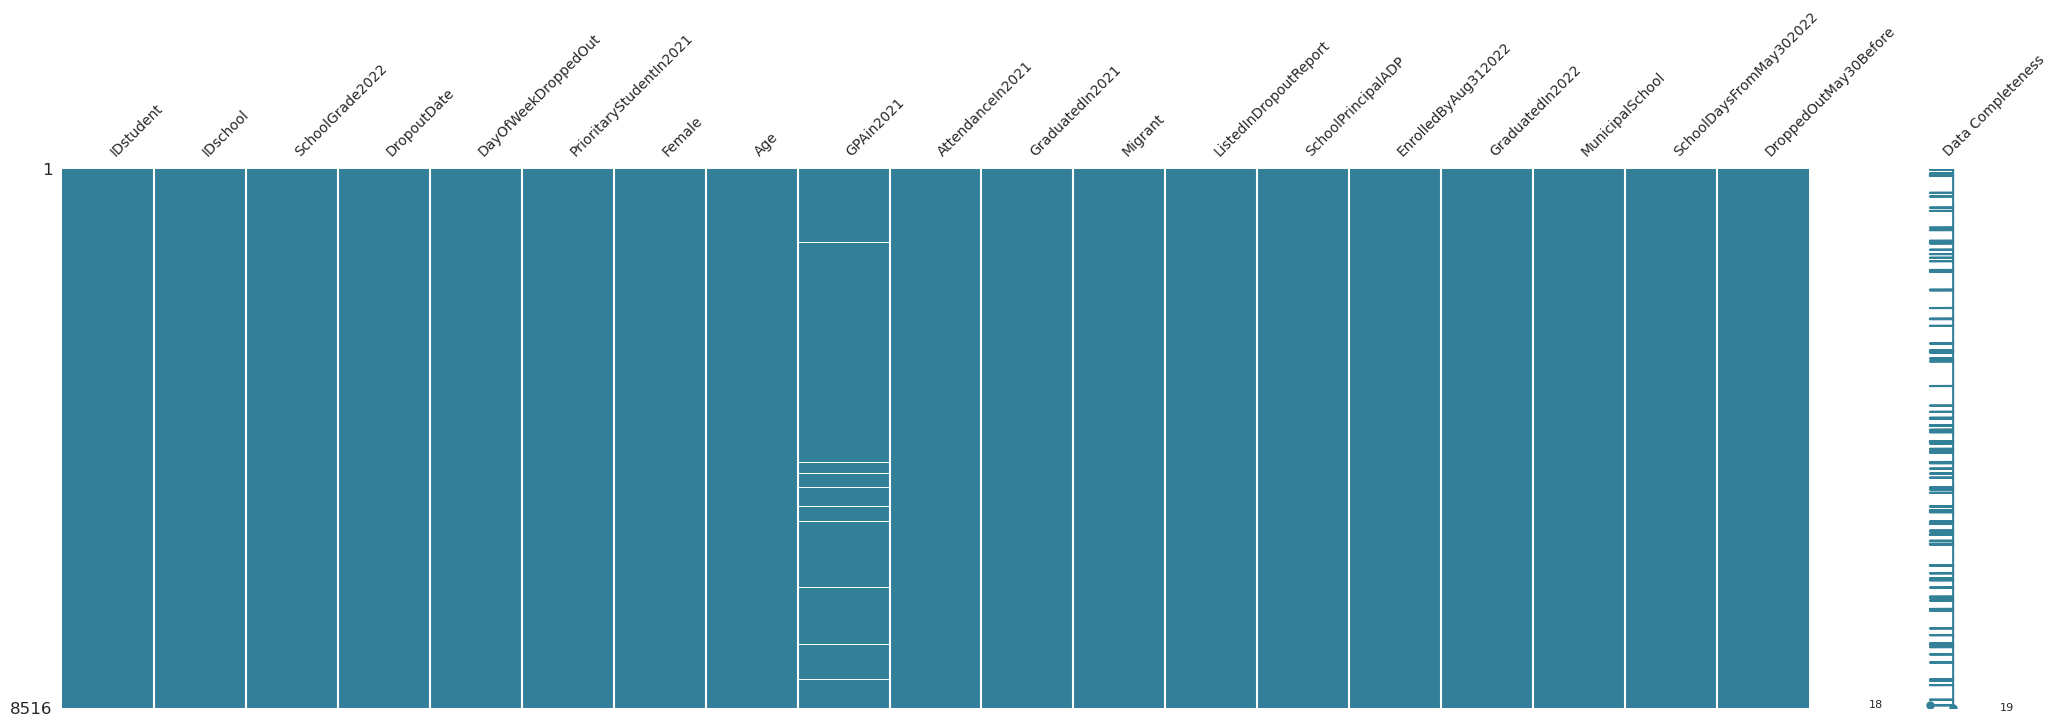

In [104]:
# Matriz de nulos

msno.matrix(df, figsize=(25, 7), fontsize=10, labels=True, color=(0.2, 0.5, 0.6));

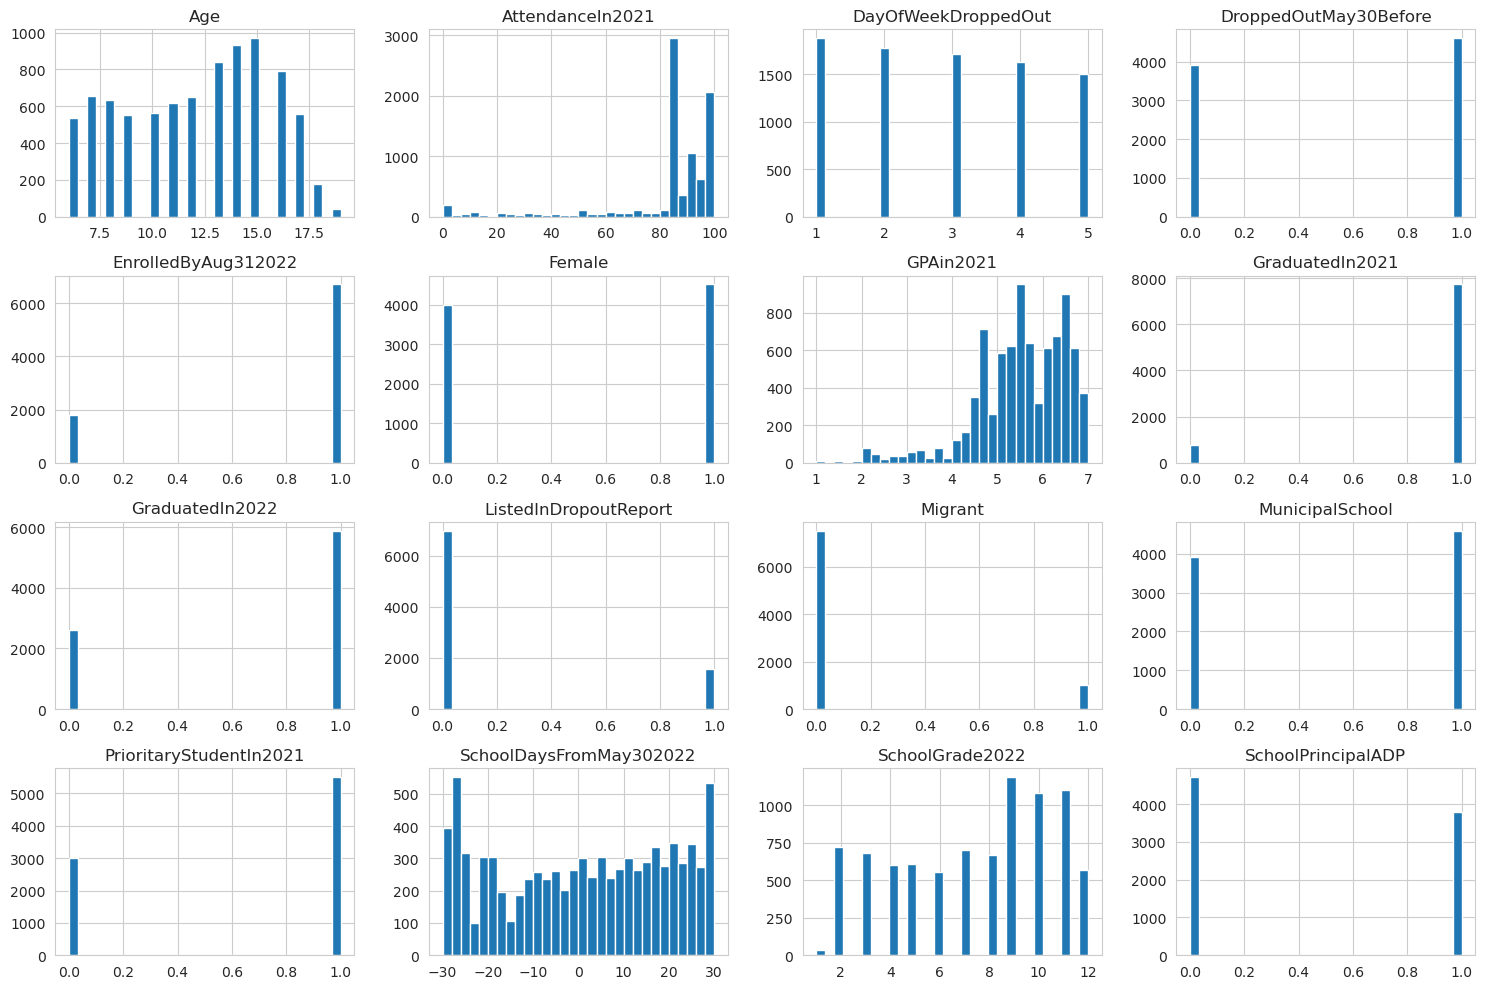

In [105]:
# Excluir columnas que sean IDs, por ejemplo 'IDstudent' o 'IDschool'
columns_to_exclude = ['IDstudent', 'IDschool']  # Ajusta esto a los nombres de tus columnas de IDs

# Seleccionar columnas numéricas incluyendo los tipos float32, int8, int16, etc.
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int64', 'int8', 'int16']).columns

# Excluir las columnas de IDs
numeric_columns = numeric_columns.difference(columns_to_exclude)

# Generar el histograma solo para las columnas numéricas relevantes
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.savefig('../figures/Histograma.png')
plt.show()

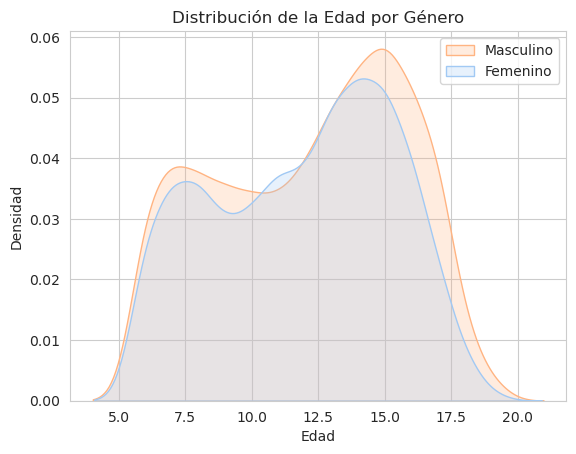

In [106]:
sns.kdeplot(data=df, x='Age', hue='Female', fill=True, palette="pastel")
plt.title("Distribución de la Edad por Género")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend(labels=["Masculino", "Femenino"])
plt.show()

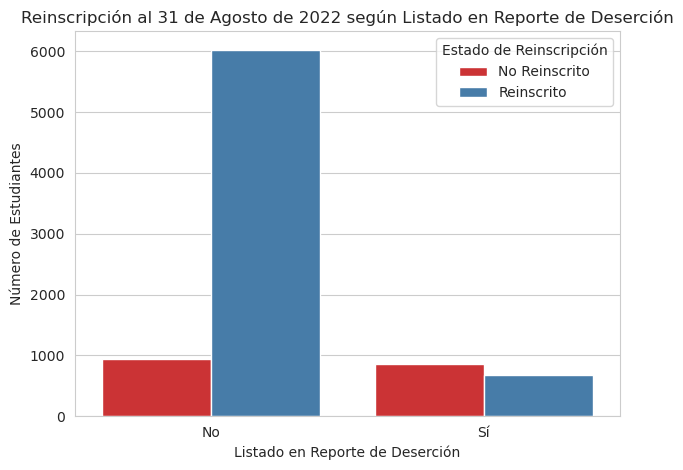

In [107]:
# Crear gráfico de barras para Enrollment by August 2022 en función de si fue listado en el reporte
sns.countplot(data=df, x='ListedInDropoutReport', hue='EnrolledByAug312022', palette="Set1")
plt.title("Reinscripción al 31 de Agosto de 2022 según Listado en Reporte de Deserción")
plt.xlabel("Listado en Reporte de Deserción")
plt.ylabel("Número de Estudiantes")
plt.legend(["No Reinscrito", "Reinscrito"], title="Estado de Reinscripción")
plt.xticks([0, 1], ["No", "Sí"])
plt.tight_layout(
)
plt.savefig('../figures/Listed_dropeed.png')
plt.show()


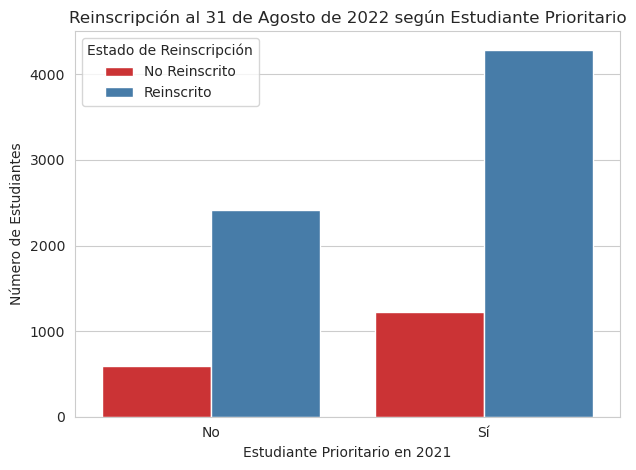

In [108]:
# Crear gráfico de barras para EnrolledByAug312022 en función de PrioritaryStudentIn2021
sns.countplot(data=df, x='PrioritaryStudentIn2021', hue='EnrolledByAug312022', palette="Set1")

# Títulos y etiquetas
plt.title("Reinscripción al 31 de Agosto de 2022 según Estudiante Prioritario")
plt.xlabel("Estudiante Prioritario en 2021")
plt.ylabel("Número de Estudiantes")
plt.legend(["No Reinscrito", "Reinscrito"], title="Estado de Reinscripción")
plt.xticks([0, 1], ["No", "Sí"])  # Etiquetas para el eje x
plt.tight_layout()
plt.savefig('../figures/prioritary_dropeed.png')
plt.show()

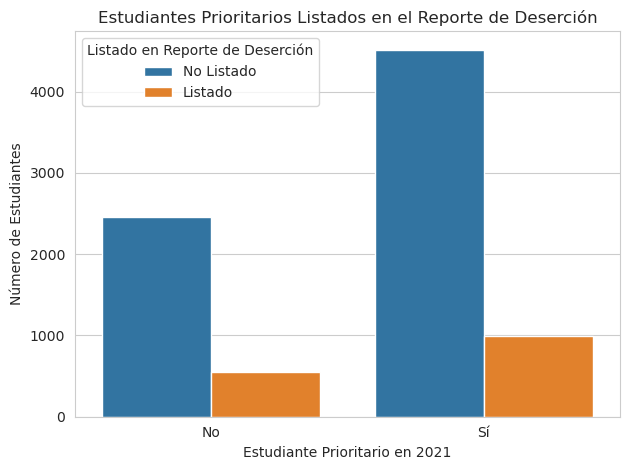

In [109]:
# Crear gráfico de barras para PrioritaryStudentIn2021 en función de ListedInDropoutReport
sns.countplot(data=df, x='PrioritaryStudentIn2021', hue='ListedInDropoutReport')

# Títulos y etiquetas
plt.title("Estudiantes Prioritarios Listados en el Reporte de Deserción")
plt.xlabel("Estudiante Prioritario en 2021")
plt.ylabel("Número de Estudiantes")
plt.legend(["No Listado", "Listado"], title="Listado en Reporte de Deserción")
plt.xticks([0, 1], ["No", "Sí"])  # Etiquetas para el eje x
plt.tight_layout()
plt.savefig('../figures/prioritary_listed.png')
plt.show()

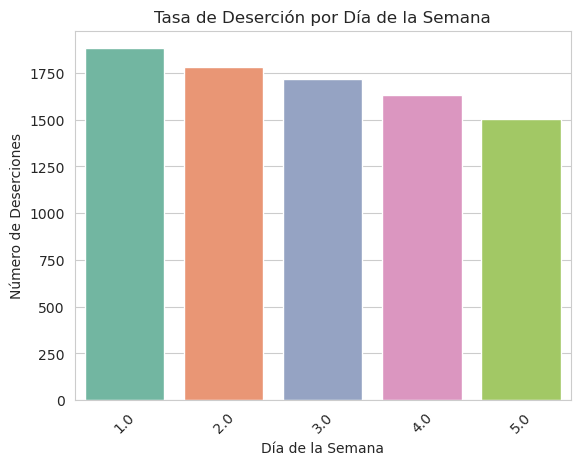

In [110]:
sns.countplot(data=df, x='DayOfWeekDroppedOut', palette="Set2")
plt.title("Tasa de Deserción por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Deserciones")
plt.xticks(rotation=45)
plt.show()

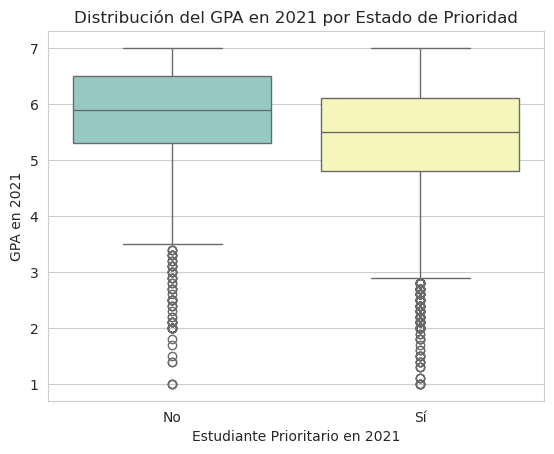

In [111]:
sns.boxplot(data=df, x='PrioritaryStudentIn2021', y='GPAin2021', palette="Set3")
plt.title("Distribución del GPA en 2021 por Estado de Prioridad")
plt.xlabel("Estudiante Prioritario en 2021")
plt.ylabel("GPA en 2021")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

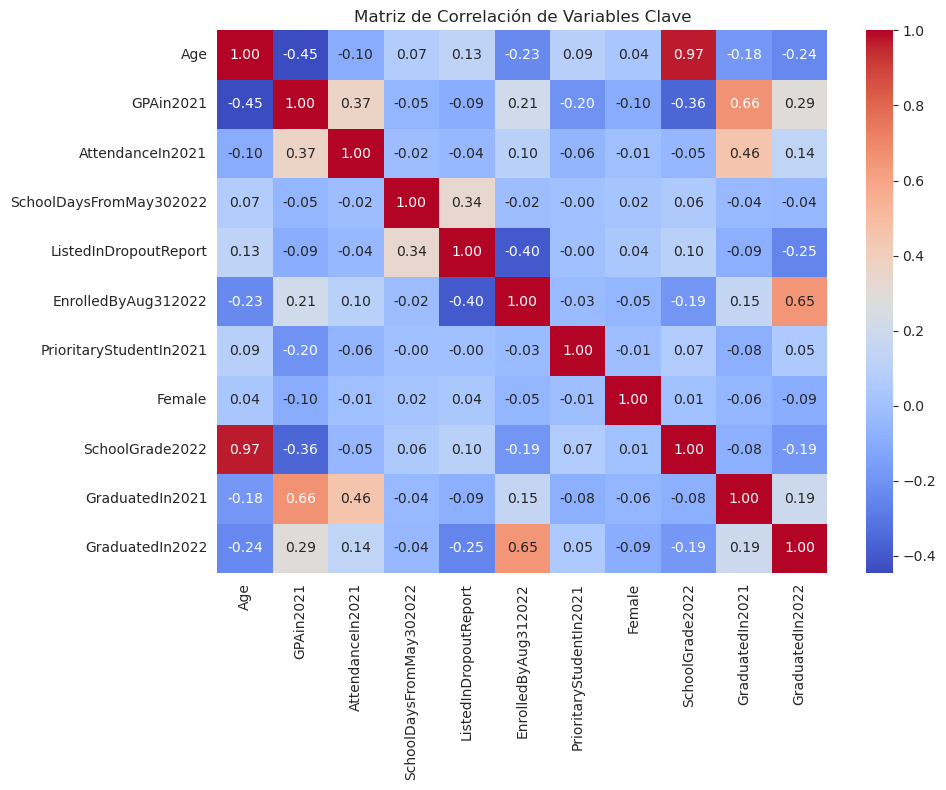

In [112]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'GPAin2021', 'AttendanceIn2021', 'SchoolDaysFromMay302022', 'ListedInDropoutReport',
                         'EnrolledByAug312022','PrioritaryStudentIn2021','Female','SchoolGrade2022','GraduatedIn2021','GraduatedIn2022']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Variables Clave")
plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png')
plt.show()


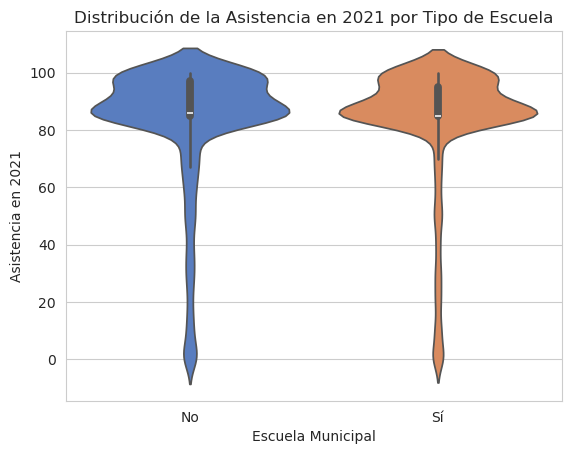

In [113]:
sns.violinplot(data=df, x='MunicipalSchool', y='AttendanceIn2021', palette="muted")
plt.title("Distribución de la Asistencia en 2021 por Tipo de Escuela")
plt.xlabel("Escuela Municipal")
plt.ylabel("Asistencia en 2021")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

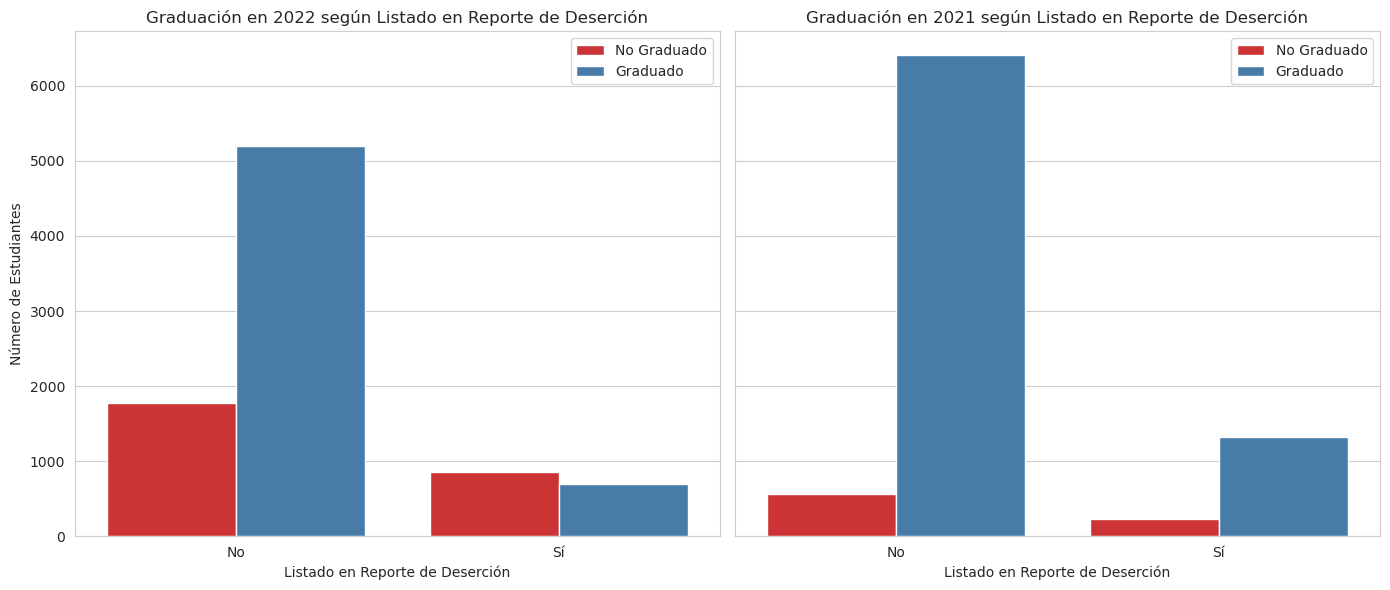

In [114]:
# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para GraduatedIn2022
sns.countplot(data=df, x='ListedInDropoutReport', hue='GraduatedIn2022', palette="Set1", ax=axes[0])
axes[0].set_title("Graduación en 2022 según Listado en Reporte de Deserción")
axes[0].set_xlabel("Listado en Reporte de Deserción")
axes[0].set_ylabel("Número de Estudiantes")
axes[0].legend(["No Graduado", "Graduado"])
axes[0].set_xticklabels(["No", "Sí"])

# Gráfico para GraduatedIn2021
sns.countplot(data=df, x='ListedInDropoutReport', hue='GraduatedIn2021', palette="Set1", ax=axes[1])
axes[1].set_title("Graduación en 2021 según Listado en Reporte de Deserción")
axes[1].set_xlabel("Listado en Reporte de Deserción")
axes[1].set_ylabel("")
axes[1].legend(["No Graduado", "Graduado"])
axes[1].set_xticklabels(["No", "Sí"])

# Ajustar diseño
plt.tight_layout()
plt.savefig('../figures/Graduaciones_listed.png')
plt.show()

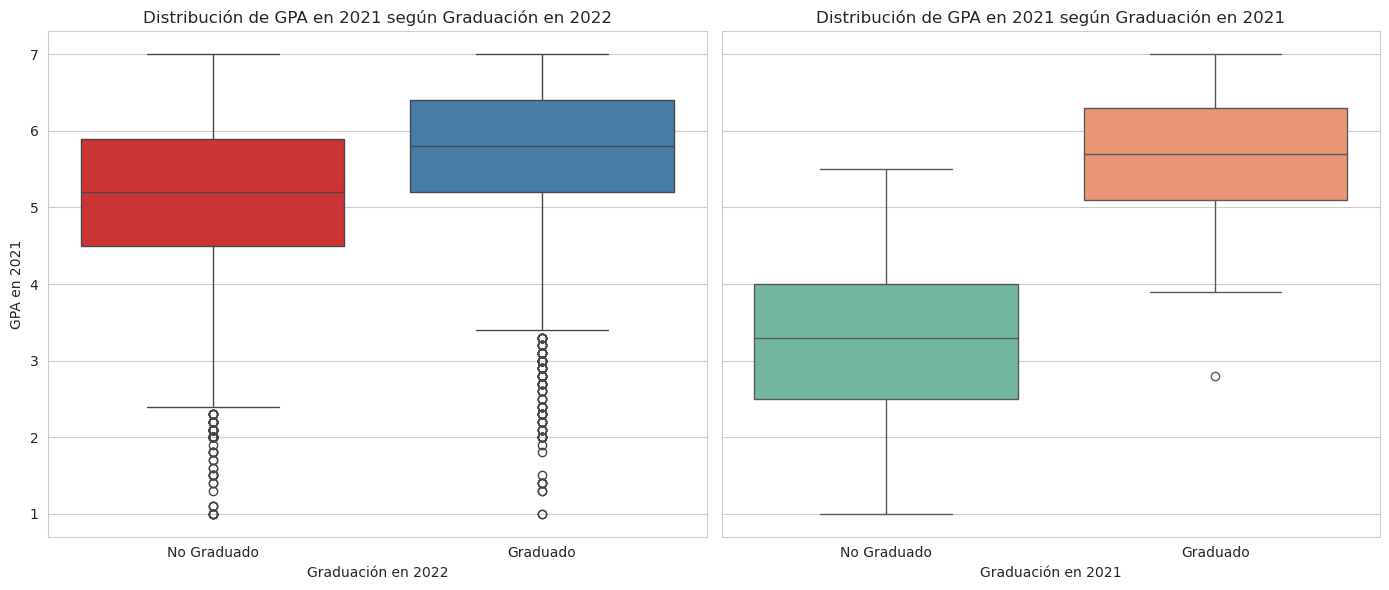

In [115]:
# Crear figura y subplots para la graduación en 2021 y 2022
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot de GPA en 2022 según estado de graduación
sns.boxplot(data=df, x='GraduatedIn2022', y='GPAin2021', palette="Set1", ax=axes[0])
axes[0].set_title("Distribución de GPA en 2021 según Graduación en 2022")
axes[0].set_xlabel("Graduación en 2022")
axes[0].set_ylabel("GPA en 2021")
axes[0].set_xticklabels(["No Graduado", "Graduado"])

# Boxplot de GPA en 2021 según estado de graduación
sns.boxplot(data=df, x='GraduatedIn2021', y='GPAin2021', palette="Set2", ax=axes[1])
axes[1].set_title("Distribución de GPA en 2021 según Graduación en 2021")
axes[1].set_xlabel("Graduación en 2021")
axes[1].set_ylabel("")
axes[1].set_xticklabels(["No Graduado", "Graduado"])

# Ajustar diseño
plt.tight_layout()
plt.show()


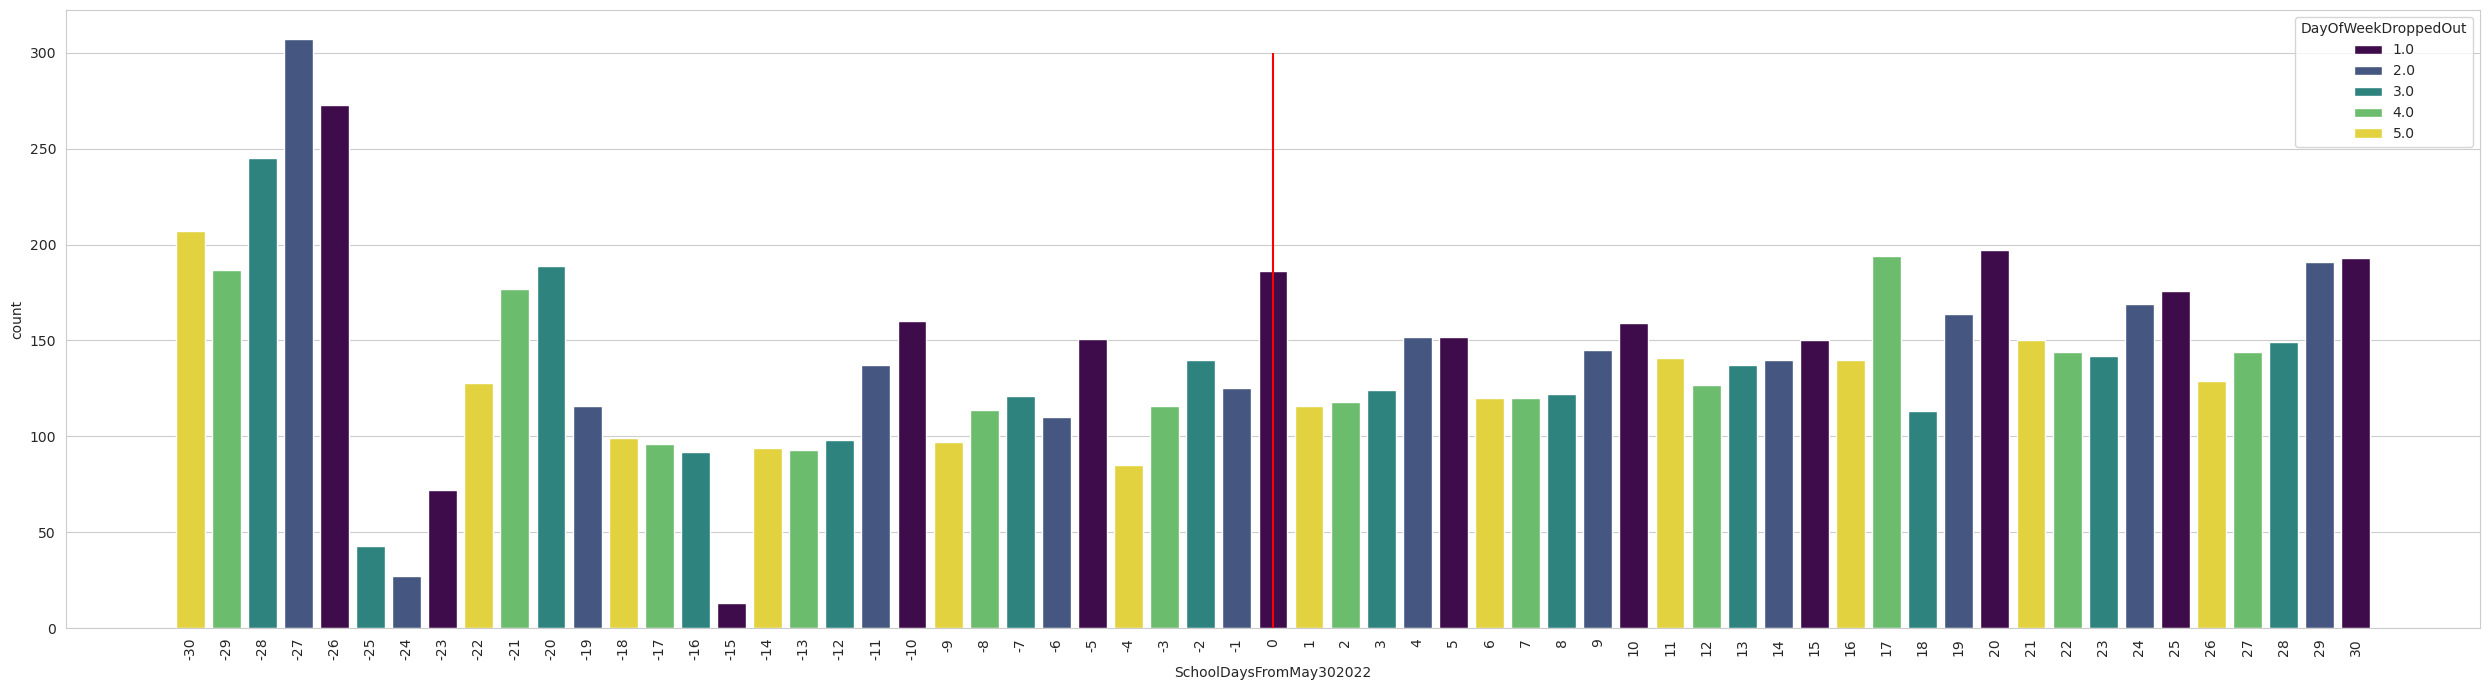

In [116]:
# Grafico Fecha de abandono

plt.figure(figsize=(25,7))
sns.countplot(data=df, x='SchoolDaysFromMay302022',order=df['SchoolDaysFromMay302022'].sort_values().unique(), hue='DayOfWeekDroppedOut', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x=30, ymin=0, ymax=300, color='red', linestyle='-')
plt.tight_layout()
plt.savefig('../figures/SchoolDaysFromMay302020.png')

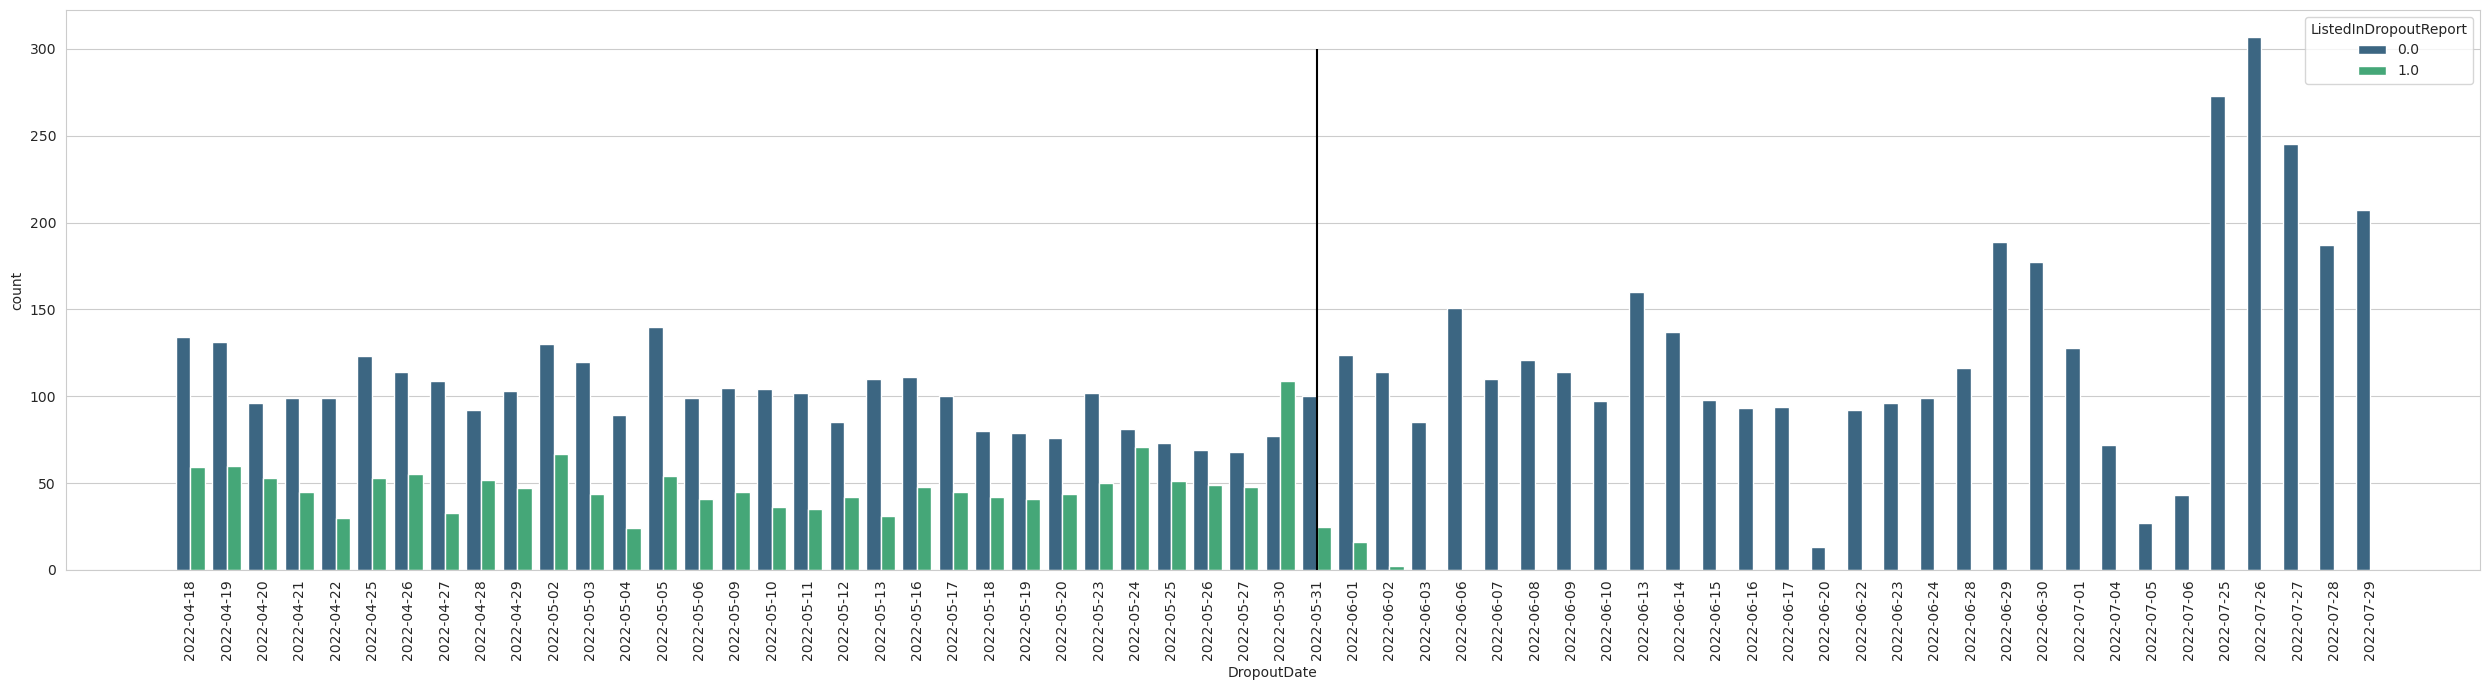

In [117]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='DropoutDate',order=df['DropoutDate'].sort_values().unique(), hue='ListedInDropoutReport', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=300, color='black', linestyle='-')
plt.tight_layout()
plt.savefig('../figures/ListedInDropoutReport.png')
plt.show()

## Análisis de componentes principales PCA

In [118]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA

In [119]:
df['GPAin2021'].fillna(df['GPAin2021'].mean(), inplace=True)
df.isnull().sum()

IDstudent                  0
IDschool                   0
SchoolGrade2022            0
DropoutDate                0
DayOfWeekDroppedOut        0
PrioritaryStudentIn2021    0
Female                     0
Age                        0
GPAin2021                  0
AttendanceIn2021           0
GraduatedIn2021            0
Migrant                    0
ListedInDropoutReport      0
SchoolPrincipalADP         0
EnrolledByAug312022        0
GraduatedIn2022            0
MunicipalSchool            0
SchoolDaysFromMay302022    0
DroppedOutMay30Before      0
dtype: int64

In [120]:
# Escalado de datos
scaler = MinMaxScaler()
df1 = df.copy()
df1['DayOfWeekDroppedOut'] = df['DayOfWeekDroppedOut'].astype('category')
# Crear dummies para la columna 'DayOfWeekDroppedOut' sin eliminar ninguna categoría
df1_dummies = pd.get_dummies(df1['DayOfWeekDroppedOut'], prefix='DayOfWeek', drop_first=False)

# Combinar las dummies con el DataFrame original
df1 = pd.concat([df1, df1_dummies], axis=1)

# Eliminar la columna original si ya no es necesaria
df1.drop('DayOfWeekDroppedOut', axis=1, inplace=True)

# Eliminar columnas de tipo datetime64
df1_numeric = df1.select_dtypes(exclude=['datetime64'])

# Luego puedes proceder con el escalado y el PCA
df1_scaled = scaler.fit_transform(df1_numeric)
df1_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.17439812e-04, 0.00000000e+00, 7.27272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.34879624e-04, 0.00000000e+00, 8.18181818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99765120e-01, 9.98977651e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99882560e-01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 7.27272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [121]:
# Análisis PCA para conservar el 90% de la varianza
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(df1_scaled)
pca_result = pd.DataFrame(pca_result, columns=[f'PC_{i+1}' for i in range(pca_result.shape[1])])
pca_result

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,1.044163,-0.172175,1.091257,0.090069,0.802780,0.165542,0.103126,0.158339,0.941032,-0.737061,0.146799,-0.108764,0.833264
1,1.135009,0.710958,0.124611,0.437322,-0.267209,-0.124508,0.275895,0.094091,0.941281,-0.452454,0.027334,-0.158215,1.076732
2,1.184591,0.502131,0.315351,-0.382660,-0.346681,-0.012213,0.652115,-0.614896,-0.164024,0.015888,0.099903,-0.529892,-0.328515
3,1.355588,1.026299,0.081376,-0.258731,-0.264195,0.662446,-0.397605,-0.131563,-0.087586,0.122339,-0.531879,-0.356219,-0.112968
4,0.983028,-0.214859,1.180427,0.359562,-0.177566,0.155667,0.559008,-0.642781,-0.102243,-0.468780,-0.401244,-0.288415,-0.159081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,-0.309102,0.090791,-0.954469,-0.140676,0.287045,0.643558,-0.367185,-0.044758,-0.138166,0.685636,0.411593,0.556749,-0.218861
8512,-0.789810,0.470746,-0.445996,-0.228125,-0.631554,0.605455,-0.442635,-0.053089,-0.081885,0.007020,0.286725,0.574576,-0.395018
8513,-1.083424,-0.462106,-0.069630,-0.275751,0.330716,0.818269,-0.591752,-0.001701,-0.157196,0.596483,0.120443,0.599478,-0.114475
8514,-0.675812,-0.042528,0.754744,-0.592657,0.528844,0.129668,0.025569,0.251561,0.872708,-0.181849,0.438056,0.517506,-0.568687


In [122]:
# Ajustar PCA sin reducción de dimensiones para calcular la varianza explicada
pca_full = PCA()
pca_full.fit(df1_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

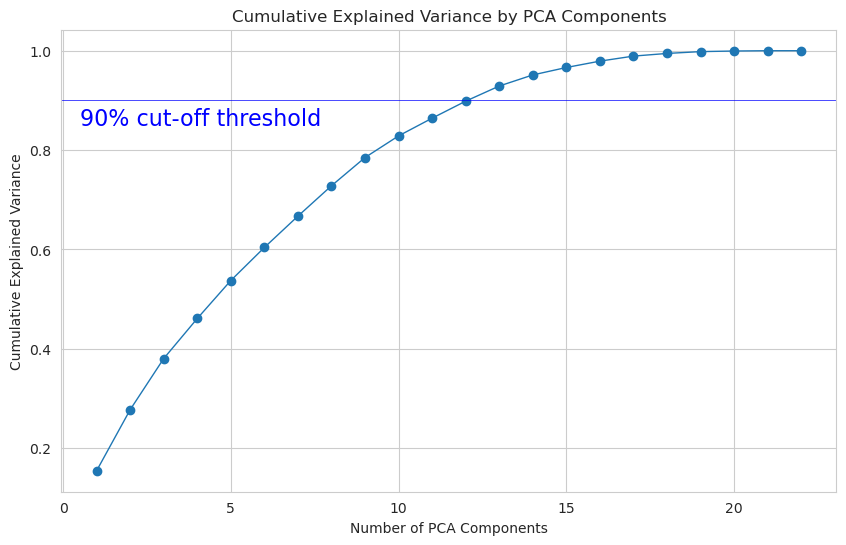

In [123]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', linewidth=1)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='blue', linestyle='-', linewidth=0.5)  # Línea de corte de 90% de varianza
plt.text(0.5, 0.85, '90% cut-off threshold', color='blue', fontsize=16)
plt.savefig('../figures/CumulativeExplainedVariance.png')

> Numero optimo de componentes es 10

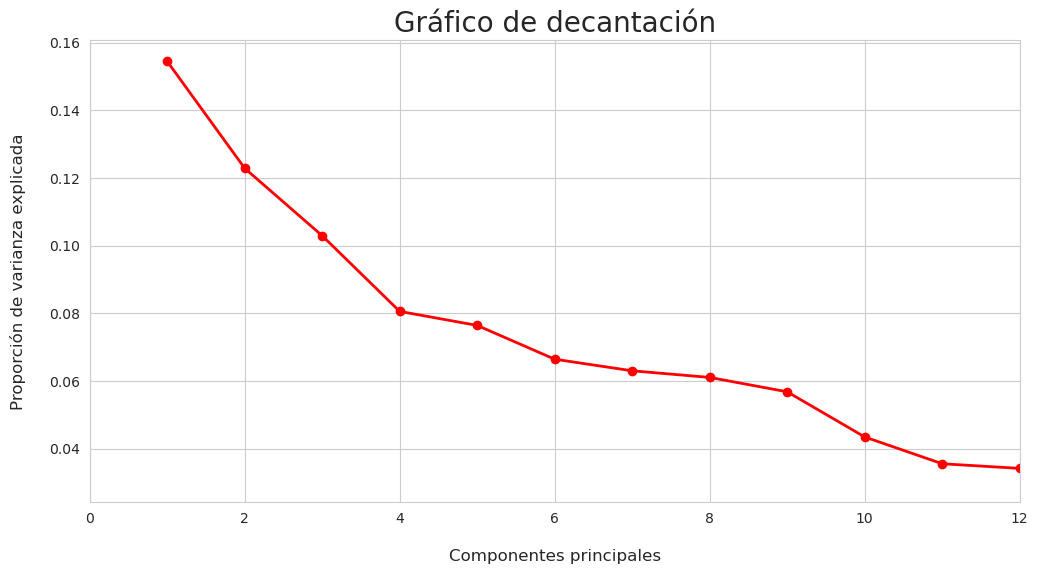

In [124]:
# Gráfico de decantación de PCA
plt.figure(figsize=(12, 6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Gráfico de decantación', fontsize=20)
plt.xlabel('\nComponentes principales', fontsize=12)
plt.xlim(0, 12)
plt.ylabel('Proporción de varianza explicada\n', fontsize=12)
plt.savefig('../figures/decantacion.png')
plt.show()

In [125]:
# Proporción de la varianza explicada
print("Proporción de la varianza explicada:", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)
print("\nVarianza explicada acumulada:", out_sum)

Proporción de la varianza explicada: [0.15445409 0.12287904 0.10296271 0.08062201 0.07648266 0.06650308
 0.06308307 0.06112417 0.05688177 0.04355556 0.03563809 0.03426785
 0.03044881]

Varianza explicada acumulada: [0.15445409 0.27733313 0.38029584 0.46091785 0.53740051 0.6039036
 0.66698667 0.72811083 0.78499261 0.82854817 0.86418626 0.89845411
 0.92890292]


In [126]:
# Cargar los coeficientes de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df1.columns[1:])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
IDschool,-0.140979,0.068693,0.041016,0.004783,-0.018981,0.003060,0.019399,0.015462,0.008527,0.144963,0.193747,0.731329,-0.191168
SchoolGrade2022,-0.097190,0.043137,0.023664,0.002069,-0.013800,0.004604,0.011334,0.012909,0.010514,0.100638,0.133565,0.519995,-0.135143
DropoutDate,0.075952,0.090027,0.098018,-0.145559,0.030075,0.009857,0.038447,-0.004258,0.039775,-0.643058,-0.079310,0.085904,-0.232819
PrioritaryStudentIn2021,0.081179,-0.054128,-0.101746,-0.865384,-0.135698,0.008389,-0.100747,0.046480,-0.056227,0.247448,0.176523,-0.117238,-0.160022
Female,0.073258,0.112745,0.177857,0.135500,-0.957176,-0.068508,-0.072572,-0.031469,0.024613,-0.001345,-0.042508,-0.020977,-0.023382
Age,0.088417,0.098898,0.106645,-0.151240,0.014781,0.008935,0.031415,-0.003621,0.036576,-0.587684,-0.042447,0.084986,-0.150306
GPAin2021,-0.056303,-0.052953,-0.067881,0.102081,0.021282,-0.001997,0.002830,0.000693,-0.003525,0.157389,-0.150568,-0.048149,-0.207527
AttendanceIn2021,-0.015711,-0.041996,-0.053792,0.058418,-0.004183,-0.004810,0.014790,-0.007619,0.013448,0.061452,-0.212412,-0.099381,-0.382075
GraduatedIn2021,-0.064143,-0.073079,-0.090946,0.106317,0.018316,-0.003311,0.008719,-0.005169,-0.003132,0.147498,-0.327948,-0.108730,-0.718225
Migrant,0.067164,0.012316,0.109392,0.349611,0.078125,0.002822,0.009012,-0.025343,-0.025499,0.069449,0.371301,-0.174602,-0.138784


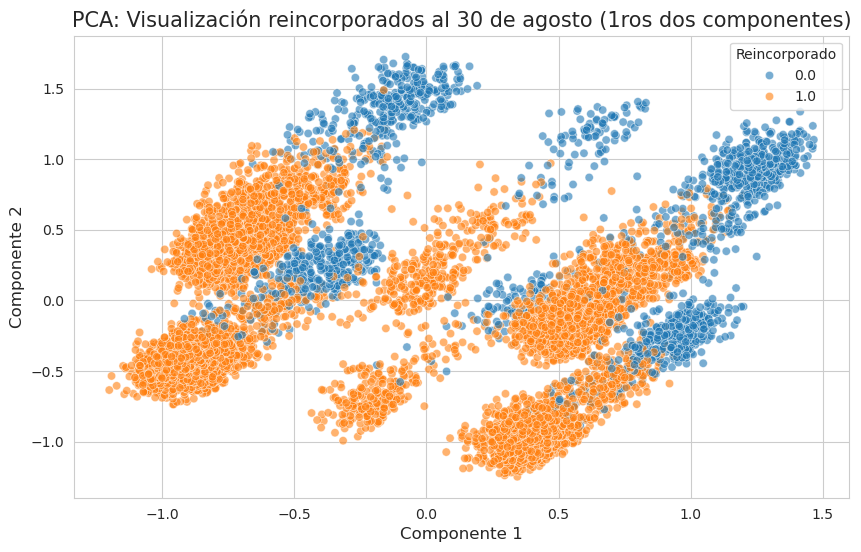

In [127]:
# Aplicar PCA con el número óptimo de componentes (7 en este caso)
pca1 = PCA(n_components=7)
pca_result1 = pca1.fit_transform(df1_scaled)
pca_result1 = pd.DataFrame(pca_result1, columns=[f'PC_{i+1}' for i in range(pca_result1.shape[1])])

# Visualización de los primeros dos componentes principales
para_visualizar = pd.concat([pca_result1, df['EnrolledByAug312022']], axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=para_visualizar, x='PC_1', y='PC_2', hue='EnrolledByAug312022', alpha=0.6)
plt.title('PCA: Visualización reincorporados al 30 de agosto (1ros dos componentes)', fontsize=15)
plt.xlabel('Componente 1', fontsize=12)
plt.ylabel('Componente 2', fontsize=12)
plt.legend(title='Reincorporado', fontsize=10, loc='upper right')
plt.savefig('../figures/PCAVisualizar.png')
plt.show()

In [128]:
# Cargar los coeficientes de los 7 primeros componentes
loadings2 = pd.DataFrame(pca1.components_.T, columns=[f'PC{i+1}' for i in range(7)], index=df1.columns[1:])
loadings2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
IDschool,-0.140979,0.068693,0.041016,0.004783,-0.018981,0.003060,0.019399
SchoolGrade2022,-0.097190,0.043137,0.023664,0.002069,-0.013800,0.004604,0.011334
DropoutDate,0.075952,0.090027,0.098018,-0.145559,0.030075,0.009857,0.038447
PrioritaryStudentIn2021,0.081179,-0.054128,-0.101746,-0.865384,-0.135698,0.008389,-0.100747
Female,0.073258,0.112745,0.177857,0.135500,-0.957176,-0.068508,-0.072572
Age,0.088417,0.098898,0.106645,-0.151240,0.014781,0.008935,0.031415
GPAin2021,-0.056303,-0.052953,-0.067881,0.102082,0.021282,-0.001997,0.002830
AttendanceIn2021,-0.015711,-0.041996,-0.053792,0.058418,-0.004183,-0.004809,0.014790
GraduatedIn2021,-0.064143,-0.073079,-0.090946,0.106317,0.018316,-0.003311,0.008718
Migrant,0.067164,0.012316,0.109392,0.349611,0.078125,0.002822,0.009012


In [129]:
# Ordenar los coeficientes de cada componente principal
[loadings2[i].sort_values(ascending=False) for i in loadings2.columns]

[MunicipalSchool            0.631709
 SchoolPrincipalADP         0.616076
 ListedInDropoutReport      0.130448
 DroppedOutMay30Before      0.111245
 Age                        0.088417
 PrioritaryStudentIn2021    0.081179
 DropoutDate                0.075952
 Female                     0.073258
 Migrant                    0.067164
 SchoolDaysFromMay302022    0.066363
 DayOfWeek_1.0              0.018748
 DayOfWeek_4.0              0.014545
 DayOfWeek_2.0              0.011453
 DayOfWeek_5.0             -0.005313
 AttendanceIn2021          -0.015711
 DayOfWeek_3.0             -0.039432
 GPAin2021                 -0.056303
 GraduatedIn2021           -0.064143
 SchoolGrade2022           -0.097190
 IDschool                  -0.140979
 EnrolledByAug312022       -0.205929
 GraduatedIn2022           -0.275695
 Name: PC1, dtype: float64,
 DroppedOutMay30Before      0.580390
 ListedInDropoutReport      0.398774
 SchoolDaysFromMay302022    0.341320
 Female                     0.112745
 DayOfWeek

# Feature Engineering

In [130]:
# SET PROBLEM 4

# Modelamiento

In [131]:
# SET PROBLEM 4

# Validación

In [132]:
# SET PROBLEM 4

# Recomendaciones

SET PROBLEM 4